In [1]:
import pandas as pd
import numpy as np
inpDf = pd.read_csv('bestsellers with categories.csv')
inpDf.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
inpDf.shape

(550, 7)

Про скільки книг зберігає дані датасет?
Відповідь: 550 книг, якщо припустити що не існує дуплікатів

In [3]:
inpDf.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
inpDf.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?
Відповідь: Ні

In [4]:
inpDf['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: Fiction, Non Fiction

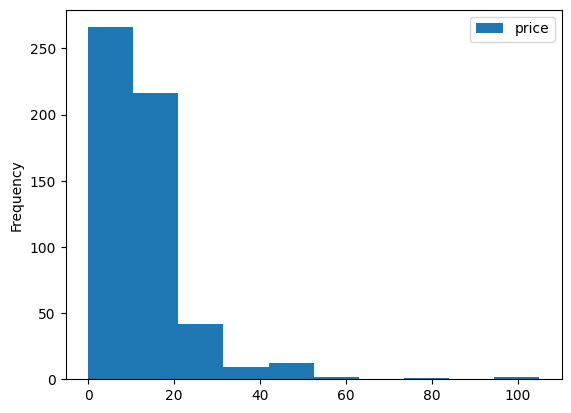

In [15]:
import matplotlib.pyplot as plt
inpDf[['genre', 'price']].plot(kind='hist', x='genre', y='price')
plt.show()

In [12]:
inpDf['price'].mean(), inpDf['price'].median(), inpDf['price'].min(), inpDf['price'].max()

(13.1, 11.0, 0, 105)

Максимальна ціна?
Відповідь: 105
Мінімальна ціна?
Відповідь: 0
Середня ціна?
Відповідь: 13.1
Медіанна ціна?
Відповідь: 11

In [22]:
inpDf['user_rating'].max(), len(inpDf.loc[inpDf['user_rating'] == inpDf['user_rating'].max()])

(4.9, 52)

Який рейтинг у датасеті найвищий?
Відповідь: 4.9

Скільки книг мають такий рейтинг?
Відповідь: 52

In [24]:
inpDf.loc[inpDf['reviews'] == inpDf['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків?
Відповідь: Where the Crawdads Sing

In [27]:
inpDf.loc[inpDf['year'] == 2015]['price'].mean()

10.42

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
Відповідь: 10.42

In [32]:
len(inpDf.loc[(inpDf['year'] == 2010) & (inpDf['genre'] == 'Fiction')])

20

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
Відповідь: 20

In [37]:
len(inpDf.loc[(inpDf['year'].isin([2010, 2011]) & (inpDf['user_rating'] == 4.9))])

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
Відповідь: 1

In [41]:
inpDf.loc[(inpDf['year'] == 2015) & (inpDf['price'] < 8)].sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку? 
Відповідь: Old School (Diary of a Wimpy Kid #10)

Агрегування даних та з'єднання таблиць

In [49]:
inpDf.groupby('genre')['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для жанру Fiction
Відповідь: 82
Мінімальна ціна для жанру Fiction
Відповідь: 0
Максимальна ціна для жанру Non Fiction
Відповідь: 105
Мінімальна ціна для жанру Non Fiction
Відповідь: 0

In [66]:
# newDf = inpDf.groupby('author')['name'].count()
newDf = inpDf.groupby('author')['name'].agg(['count'])
newDf.shape

(248, 1)

Якої розмірності вийшла таблиця? 
Відповідь: 248 рядків та 1 стовпець

In [67]:
newDf.loc[newDf['count'] == newDf['count'].max()]

,count
author,
Jeff Kinney,12


Який автор має найбільше книг? 
Відповідь: Jeff Kinney
Скільки книг цього автора? 
Відповідь: 12

In [69]:
newDf2 = inpDf.groupby('author')['user_rating'].agg(['mean'])
newDf2.loc[newDf2['mean'] == newDf2['mean'].min()]

,mean
author,
Donna Tartt,3.9


У якого автора середній рейтинг мінімальний? 
Відповідь: Donna Tartt
Який у цього автора середній рейтинг? 
Відповідь: 3.9

In [78]:
newDf3 = pd.concat([newDf, newDf2], axis=1)
newDf3.sort_values(by=['count', 'mean'], inplace=True)
newDf3

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку?
Відповідь: Muriel Barbery